# Feed Forward Network

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
losses = []
torch.manual_seed(42)

In [3]:
torch.cuda.is_available()

True

In [4]:
x = torch.tensor([[1,0],[0,2],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([0,1,1,0], dtype = torch.float32)

In [5]:
class xor(nn.Module):
    def __init__(self):
        super(xor,self).__init__()
        self.l1 = nn.Linear(2,2,bias=True)
        self.sig1 = nn.Sigmoid()
        self.l2 = nn.Linear(2,1,bias = True)
        self.sig2 = nn.Sigmoid()
    def forward(self, x):
        x = self.l1(x)
        x = self.sig1(x)
        x = self.l2(x)
        x = self.sig2(x)
        return x

In [6]:
class mydata(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, id):
Drag files here to add them to your repository



In [7]:
data = mydata(x,y)
batch = 1
loader = DataLoader(data, batch_size = batch, shuffle = True)
device = torch.device("cuda")
model = xor().to(device)
print(model)

xor(
  (l1): Linear(in_features=2, out_features=2, bias=True)
  (sig1): Sigmoid()
  (l2): Linear(in_features=2, out_features=1, bias=True)
  (sig2): Sigmoid()
)


In [8]:
loss = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.03)


In [9]:
def train_one_epoch(index):
    total = 0
    for i, data in enumerate(loader):
        inputs, labels = data
        optim.zero_grad()
        outputs = model(inputs)
        l = loss(outputs.flatten(), labels)
        l.backward()
        optim.step()
        total += l.item()
    return total/len(loader)/batch

In [10]:
epochs = 10000
for epoch in range(epochs):
    model.train(True)
    l = train_one_epoch(model)
    losses.append(l)
    if epoch%1000==0:
        print(f"epoch: {epoch}\nLoss:{l}\n")

epoch: 0
Loss:0.2721938416361809

epoch: 1000
Loss:0.1984398066997528

epoch: 2000
Loss:0.17999912379309535

epoch: 3000
Loss:0.1729552773758769

epoch: 4000
Loss:0.1631110676098615

epoch: 5000
Loss:0.14742184849455953

epoch: 6000
Loss:0.138814945705235

epoch: 7000
Loss:0.13455965486355126

epoch: 8000
Loss:0.13223969005048275

epoch: 9000
Loss:0.13084082782734185



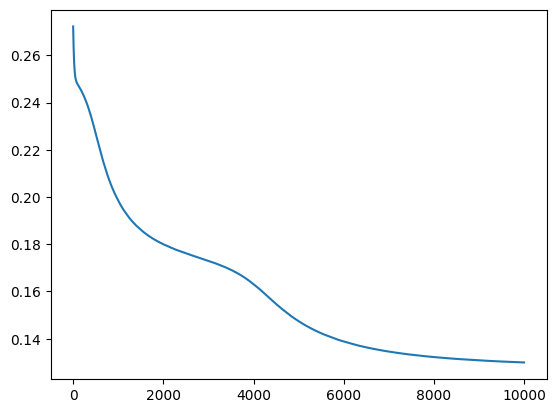

In [11]:
plt.plot(losses)

In [12]:
def sigmoid(x):
    return 1.0/(1+torch.exp(-x))


In [13]:
test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(model.l1.weight, test) + model.l1.bias
layer1 = sigmoid(layer1)
layer2 = torch.matmul(model.l2.weight, layer1) + model.l2.bias
layer2 = sigmoid(layer2)
print(layer2)

tensor([0.9698], device='cuda:0', grad_fn=<MulBackward0>)
